In [4]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Activation,Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
import seaborn as sn

In [5]:
df = pd.read_csv('/content/train_all_tasks.csv')
df.head()

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


In [7]:
df.shape

(14000, 5)

**Data Preprocess**

In [9]:
import seaborn as sns


<Axes: xlabel='label_sexist', ylabel='count'>

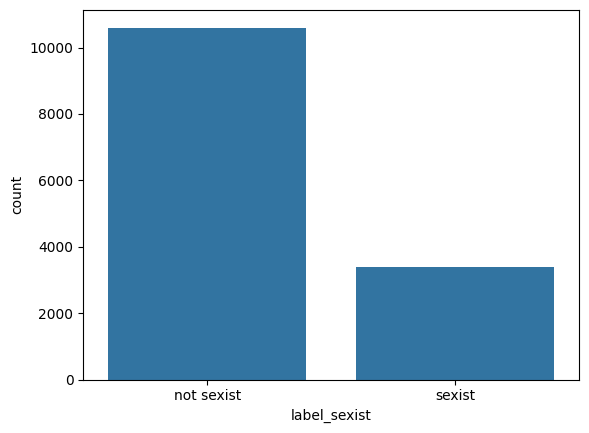

In [10]:
sns.countplot(x='label_sexist', data=df)

In [11]:
df.label_sexist.replace("sexist", 1, inplace=True)
df.label_sexist.replace("not_sexist", 0, inplace=True)

<ipython-input-11-85ee4991a05e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label_sexist.replace("sexist", 1, inplace=True)
<ipython-input-11-85ee4991a05e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [13]:
df=df.drop(['rewire_id','label_category', 'label_vector'], axis=1)

In [14]:
df.head()

,text,label_sexist
0,"Damn, this writing was pretty chaotic",not sexist
1,"Yeah, and apparently a bunch of misogynistic v...",not sexist
2,How the FUCK is this woman still an MP!!!???,not sexist
3,Understand. Know you're right. At same time I ...,not sexist
4,Surprized they didn't stop and rape some women,not sexist


In [15]:
df.label_sexist.replace("sexist", 1, inplace=True)
df.label_sexist.replace("not sexist", 0, inplace=True)

<ipython-input-15-5ea192e3f472>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label_sexist.replace("sexist", 1, inplace=True)
<ipython-input-15-5ea192e3f472>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [16]:
df.head()

,text,label_sexist
0,"Damn, this writing was pretty chaotic",0
1,"Yeah, and apparently a bunch of misogynistic v...",0
2,How the FUCK is this woman still an MP!!!???,0
3,Understand. Know you're right. At same time I ...,0
4,Surprized they didn't stop and rape some women,0


In [17]:
def preprocess_text(text):

    # Lowercasing sentence
    sentence = text.lower()

    # remove url
    pattern1 = re.compile(r'https?://\S+|www\.\S+')
    sentence = pattern1.sub('', sentence)

    # Removing html tags
    pattern2 = re.compile('<.*?>')
    sentence = pattern2.sub('', sentence)

    # Removing punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Removing single character
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

df['text'] = df['text'].apply(preprocess_text)

In [18]:
df.head()

,text,label_sexist
0,damn this writing was pretty chaotic,0
1,yeah and apparently bunch of misogynistic virg...,0
2,how the fuck is this woman still an mp,0
3,understand know you re right at same time know...,0
4,surprized they didn stop and rape some women,0


In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
word_counts = tokenizer.word_counts

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['label_sexist'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


Train size: 9800
Validation size: 2100
Test size: 2100


In [22]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_val = word_tokenizer.texts_to_sequences(X_val)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [23]:
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

17143

In [24]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [27]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [28]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

**CNN**

In [29]:
from keras.layers import Conv1D
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM

In [30]:
cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       1,714,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,714,300 (6.54 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,714,300 (6.54 MB)

None


In [33]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
cnn_model_history = cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=20, verbose=1, callbacks=[early_stopping])

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - acc: 0.7375 - loss: 0.5783 - val_acc: 0.7743 - val_loss: 0.4697
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - acc: 0.8272 - loss: 0.4058 - val_acc: 0.8071 - val_loss: 0.4425
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - acc: 0.8642 - loss: 0.3415 - val_acc: 0.8162 - val_loss: 0.4323
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - acc: 0.8876 - loss: 0.2957 - val_acc: 0.8119 - val_loss: 0.4618
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - acc: 0.9115 - loss: 0.2456 - val_acc: 0.8129 - val_loss: 0.4442
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - acc: 0.9421 - loss: 0.1862 - val_acc: 0.8143 - val_loss: 0.4771


In [34]:
score = cnn_model.evaluate(X_test, y_test, verbose=1)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.7998 - loss: 0.4403


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


Text(50.722222222222214, 0.5, 'Truth')

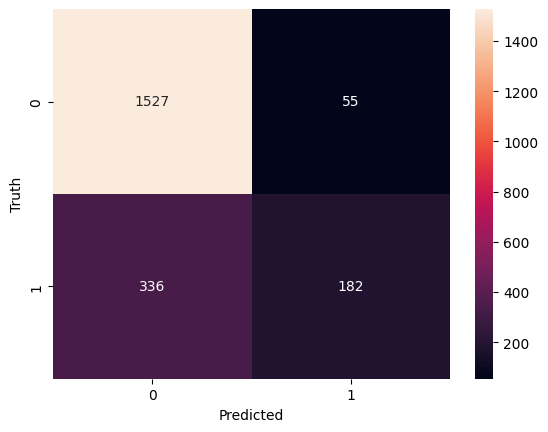

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import sys
import numpy as np

np.set_printoptions(threshold=sys.maxsize)
y_pred = cnn_model.predict(X_test)
y_pred = y_pred.flatten()
y_pred = np.where(y_pred > 0.5, 1, 0)

cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1582
           1       0.77      0.35      0.48       518

    accuracy                           0.81      2100
   macro avg       0.79      0.66      0.68      2100
weighted avg       0.81      0.81      0.79      2100



**BiLSTM**

In [37]:
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

In [38]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(Bidirectional(LSTM(128,activation='relu')))

lstm_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       1,714,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,714,300 (6.54 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,714,300 (6.54 MB)

None


In [40]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
lstm_model_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=20, verbose=1, callbacks=[early_stopping])

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 88s 503ms/step - acc: 0.7202 - loss: 5.3250 - val_acc: 0.7319 - val_loss: 74.3618
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 69s 417ms/step - acc: 0.7446 - loss: 70.4233 - val_acc: 0.7395 - val_loss: 31.1051
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 64s 416ms/step - acc: 0.7686 - loss: 39.3814 - val_acc: 0.7771 - val_loss: 46.8202
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 84s 431ms/step - acc: 0.7619 - loss: 48.3834 - val_acc: 0.7624 - val_loss: 25.2464
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 63s 407ms/step - acc: 0.7737 - loss: 30.2265 - val_acc: 0.7767 - val_loss: 0.4880
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 63s 410ms/step - acc: 0.7974 - loss: 0.4561 - val_acc: 0.7933 - val_loss: 0.4674
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 81s 402ms/step - acc: 0.8148 - loss: 0.4313 - val_acc: 0.7981 - val_loss: 0.4601
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 83s 414ms/step - acc: 0.8240 - loss: 0.4122 - val_acc: 0.7876 - val_loss: 0.5355
Epoch 9/20
154/154 ━━━━━

In [41]:
score = lstm_model.evaluate(X_test, y_test, verbose=1)

66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - acc: 0.7813 - loss: 0.4603


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step


Text(50.722222222222214, 0.5, 'Truth')

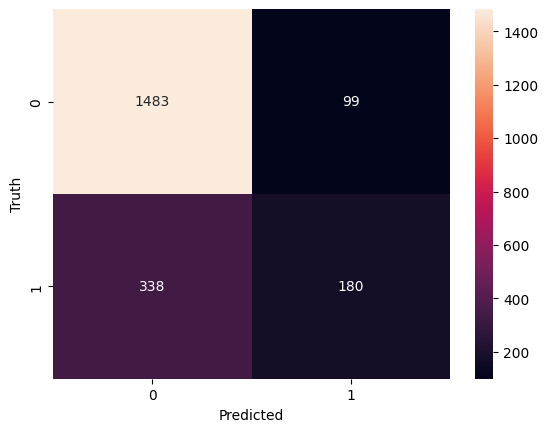

In [42]:
np.set_printoptions(threshold=sys.maxsize)
y_pred = lstm_model.predict(X_test)
y_pred = y_pred.flatten()
y_pred = np.where(y_pred > 0.5, 1, 0)

cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1582
           1       0.65      0.35      0.45       518

    accuracy                           0.79      2100
   macro avg       0.73      0.64      0.66      2100
weighted avg       0.77      0.79      0.77      2100



**GRU**


In [44]:
from keras.layers import GRU

In [45]:
gru_model = Sequential()
gru_model.add(Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
gru_model.add(GRU(256, activation='relu')),
gru_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [46]:
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(gru_model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       1,714,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,714,300 (6.54 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,714,300 (6.54 MB)

None


In [47]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
gru_model_history = gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=20, verbose=1, callbacks=[early_stopping])

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 101s 635ms/step - acc: 0.7607 - loss: 0.6018 - val_acc: 0.7471 - val_loss: 0.5657
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 123s 509ms/step - acc: 0.7595 - loss: 0.5523 - val_acc: 0.7471 - val_loss: 0.5660
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 81s 503ms/step - acc: 0.7620 - loss: 0.5500 - val_acc: 0.7471 - val_loss: 0.5658
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 79s 486ms/step - acc: 0.7610 - loss: 0.5503 - val_acc: 0.7471 - val_loss: 0.5662


In [48]:
score = gru_model.evaluate(X_test, y_test, verbose=1)

66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - acc: 0.7389 - loss: 0.5751


66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step


Text(50.722222222222214, 0.5, 'Truth')

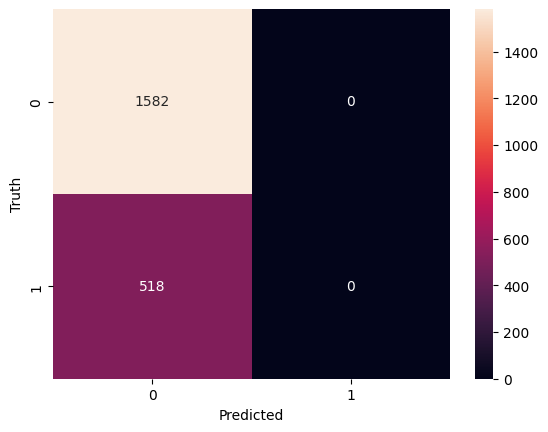

In [49]:
np.set_printoptions(threshold=sys.maxsize)
y_pred = gru_model.predict(X_test)
y_pred = y_pred.flatten()
y_pred = np.where(y_pred > 0.5, 1, 0)

cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1582
           1       0.00      0.00      0.00       518

    accuracy                           0.75      2100
   macro avg       0.38      0.50      0.43      2100
weighted avg       0.57      0.75      0.65      2100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
